# Install Dependencies

In [1]:
!pip install -q transformers

In [193]:
# Using pipeline class to make predictions from models 
from transformers import pipeline
import pandas as pd
sentiment_pipeline = pipeline("sentiment-analysis")

print(x)
data = ["I love you!", "birthday"]
sentiment_pipeline(data)

itâ€™s crazy. i hope post-covid we can get it doneðŸ¥³


[{'label': 'POSITIVE', 'score': 0.9998782277107239},
 {'label': 'POSITIVE', 'score': 0.9952004551887512}]

In [198]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)
text = "I love you!"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

ranking = scores
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


KeyError: 0.97485113

In [13]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
# Preprocess text (username and link placeholders)
sentiment_array = []

def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Twitter

In [364]:

df = pd.read_csv("saved_files/twitter_elonmusk_csv_test_full_clean.csv", usecols=['text'],encoding='utf-8')
print(df)
print(len(df))
string_array = df['text'].astype(str).values.tolist()

                                                    text
0      onlinebusiness digitalmarketing makemoneyfast ...
1      BoydCothran one of the Journals editors was re...
2      Charlie Kirk returns to Twitter Conservatives ...
3      The Washington Posts Repulsive Defense Of Twit...
4      MUSK blocked PUBLIC CITIZEN That does not mean...
...                                                  ...
13727  Twitter is reportedly reconsidering Elon Musks...
13728  BREAKING WSJ Reports Twitter Will Reconsider E...
13729  Twitter is reportedly reconsidering Elon Musks...
13730  Say goodbyeElon Musks cryptic moving on tweet ...
13731  Twitter Meeting with Elon Musk to Discuss 43 B...

[13732 rows x 1 columns]
13732


In [365]:
sentiment_array_twitter = []
text = "I love you!"

for i in range(len(string_array)):
    text = preprocess(string_array[i][:500])  #[i][:500]
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    negative = np.round(scores[0], 4)
    neutral = np.round(scores[1], 4)
    positive = np.round(scores[2], 4)

    sentiment_array_twitter.append([text,negative,neutral,positive])

In [374]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df2 = pd.DataFrame(sentiment_array_twitter,columns=['Text', 'Negative','Neutral','Positive'])
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df2)

C:\Users\00MrK\AppData\Local\Temp\ipykernel_22420\348680691.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Text,Negative,Neutral,Positive
0,onlinebusiness digitalmarketing makemoneyfast Elon Musk Posts A Series Of Engaging Tweets Following His 44 Billion Buyout Of Twitter http The world has been at a relative standstill since it was confirmed that Elon Musk was the http,0.0173,0.8245,0.1582
1,BoydCothran one of the Journals editors was recently interviewed for a NBCNews piece on Elon Musks takeover of Twitter http,0.0067,0.9361,0.0573
2,Charlie Kirk returns to Twitter Conservatives celebrate Musk takeover http found this article on MxM Newsa new app without media bias or censorship Download it here http,0.0045,0.5254,0.4701
3,The Washington Posts Repulsive Defense Of Twitter Execs Makes Even Elon Musk Look Goodhttpstcou2spmn6vBS,0.2892,0.6114,0.0994
4,MUSK blocked PUBLIC CITIZEN That does not mean he has banned it from Twitter just from his own account It is still a bad sign if Elon cannot read reasonable progressive thinking from a reasonable source Its an alarming tell,0.8194,0.1732,0.0075
...,...,...,...,...
13727,Twitter is reportedly reconsidering Elon Musks bid to buy the social media company after the Tesla CEO confirmed 465 billion in financing http,0.0212,0.9318,0.0470
13728,BREAKING WSJ Reports Twitter Will Reconsider Elon Musk Offer http,0.0076,0.9174,0.0750
13729,Twitter is reportedly reconsidering Elon Musks bid to buy the social media company after the Tesla CEO confirmed 465 billion in financing http via Yahoo,0.0173,0.9301,0.0526
13730,Say goodbyeElon Musks cryptic moving on tweet sparks speculation hes done with Twitter takeover http SmartNews,0.1599,0.8082,0.0319


In [367]:
df2.to_csv('twitter_output.csv', encoding='utf-8', index=False)

# Data Visualized - Twitter

In [368]:
index = 0
a=0
b=0
c=0

print(len(sentiment_array_twitter))

for j in range(len(sentiment_array_twitter)):
    temp_array = sentiment_array_twitter[j][1:]
    #print(temp_array)
    max = 0
    max_index = 0
    for i in range(3):
        if max < temp_array[i]:
            max = temp_array[i]
            max_index = i
    
    if max_index == 0:
        a=a+1
        #print("a")
    elif max_index == 1:
        b=b+1
        #print("b")
    else:
        c=c+1
        #print("c")
        
print("a,b,c: ", a,b,c)

13732
a,b,c:  3856 7876 2000


Text(0, 0.5, 'twitter post')

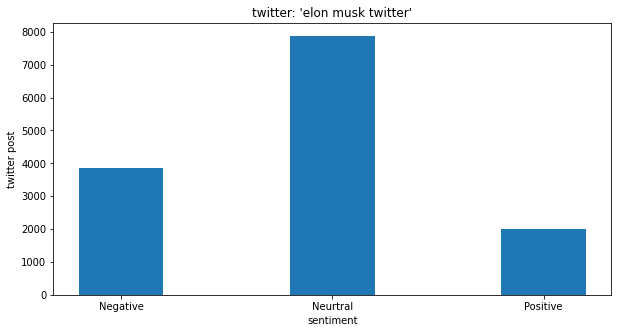

In [369]:
import matplotlib.pyplot as plt

courses = ['Negative', 'Neurtral', 'Positive']
values = [a,b,c]
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, width = 0.4)

plt.title("twitter: 'elon musk twitter'")
plt.xlabel("sentiment")
plt.ylabel("twitter post")

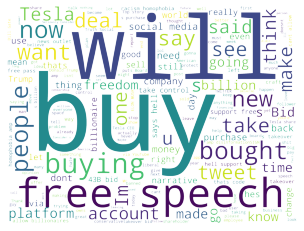

In [9]:
# importing the necessary modules:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
text = open("twitter_output.csv").read()
text = text.replace('twitter', "")
text = text.replace('Twitter', "")
text = text.replace('Elon', "")
text = text.replace('Musk', "")
text = text.replace('elon musk', "")
text = text.replace('elonmusk', "")
text = text.replace('musk', "")

wordcloud = WordCloud(width=2400, 
                      height=1800,
                      background_color="rgba(255, 255, 255, 0)", 
                      mode="RGBA").generate(text)
#wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Reddit

In [375]:

#def auto_truncate(val):
    #return val[:500]
df = pd.read_csv("saved_files/reddit_elonmusktwitter_top20comments_clean.csv", usecols=['Text'],encoding='utf-8') #, converters={'abc': auto_truncate})

#df.Text.str.replace(r'\b(\w{21,150})\b', '')

#df.to_csv('test_to_see_output.csv', encoding='utf-8', index=False)
#df = pd.read_csv("saved_files/reddit_elonmusktwitter_top20comments_clean.csv", usecols=['Text'],encoding='utf-8')
print(df)
print(len(df))
string_array = df['Text'].astype(str).values.tolist()


sentiment_array = []
text = "I love you!"

for i in range(len(string_array)):
    #print(i)
    text = preprocess(string_array[i][:500])
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    negative = np.round(float(scores[0]), 4)
    neutral = np.round(float(scores[1]), 4)
    positive = np.round(float(scores[2]), 4)

    sentiment_array.append([text,negative,neutral,positive])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [376]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df3 = pd.DataFrame(sentiment_array,columns=['Text', 'Negative','Neutral','Positive'])
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df3)

C:\Users\00MrK\AppData\Local\Temp\ipykernel_22420\1232392688.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Text,Negative,Neutral,Positive
0,FORTY FIVE BILLION jesus well I guess Im rich in spirit at least,0.0136,0.1074,0.8790
1,Between Netflix making crazy choices and now this Im almost wondering if we are seeing the Dotcom bubble 20 about to burst somehow,0.6965,0.2860,0.0175
2,I hope he buys it just for it to become the MySpace,0.2841,0.5861,0.1299
3,nan,0.0936,0.6809,0.2255
4,nan,0.0936,0.6809,0.2255
...,...,...,...,...
5182,The one time I caught a suspension I was talking about Blackrock,0.2868,0.6753,0.0379
5183,I want to see blackfacehitler trend again,0.3387,0.5584,0.1029
5184,If thats whats trending thinking it is trending so vangaurd doesnt,0.2570,0.7067,0.0363
5185,Financial Markets giant trending during one of the most volatile weeks in history You dont say,0.6043,0.3648,0.0310


In [256]:
df3.to_csv('reddit_output.csv', encoding='utf-8', index=False)

# Data Visualized - Reddit

In [371]:
index = 0
a=0
b=0
c=0

print(len(sentiment_array))

for j in range(len(sentiment_array)):
    temp_array = sentiment_array[j][1:]
    #print(temp_array)
    max = 0
    max_index = 0
    for i in range(3):
        if max < temp_array[i]:
            max = temp_array[i]
            max_index = i
    
    if max_index == 0:
        a=a+1
        #print("a")
    elif max_index == 1:
        b=b+1
        #print("b")
    else:
        c=c+1
        #print("c")
        
    print("a,b,c: ", a,b,c)

0


Text(0, 0.5, 'reddit post')

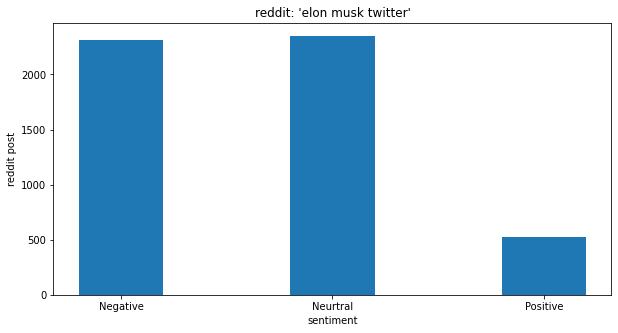

In [322]:
import matplotlib.pyplot as plt

courses = ['Negative', 'Neurtral', 'Positive']
values = [a,b,c]
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, width = 0.4)

plt.title("reddit: 'elon musk twitter'")
plt.xlabel("sentiment")
plt.ylabel("reddit post")
 

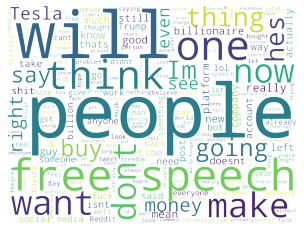

In [6]:
# importing the necessary modules:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
text = open("reddit_output.csv").read()
text = text.replace('twitter', "")
text = text.replace('Twitter', "")
text = text.replace('Elon', "")
text = text.replace('Musk', "")
#text = text.replace('people', "")
#text = text.replace('will', "")
#text = text.replace('thing', "")
#text = text.replace('going', "")
#text = text.replace('one', "")

wordcloud = WordCloud(width=2400, 
                      height=1800,
                      background_color="rgba(255, 255, 255, 0)", 
                      mode="RGBA").generate(text)
#wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()